### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [12]:
import IPython.display as ipd
from math import pi
from numpy import *
from scipy.stats import norm
from scipy.signal import windows
from scipy.constants import *
from scipy.io import wavfile
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

# Beri zvok

In [20]:
fs, data = wavfile.read('sample44100.wav')
length=0.12
x=data[0:int(fs*length)-1,0]


<ipython-input-20-f4a7cb1fede8>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('sample44100.wav')


In [7]:
ipd.Audio(data[:,0],rate=fs)

# Riši signal

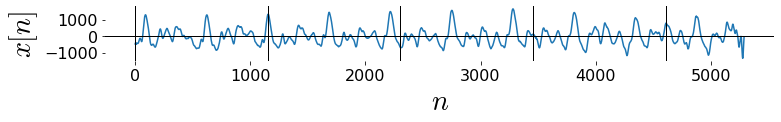

In [44]:
Nx=size(x)
Nblock=1152
#Risanje
fig, ax= plt.subplots(figsize=(12,1))
ax.plot(x)
for i in range(0,10):
    if (Nblock*i > Nx): break
    ax.axvline(i*Nblock, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
plt.ylabel(r'$x[n]$', fontsize=28)
plt.xlabel(r'$n$', fontsize=28)
ax.set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

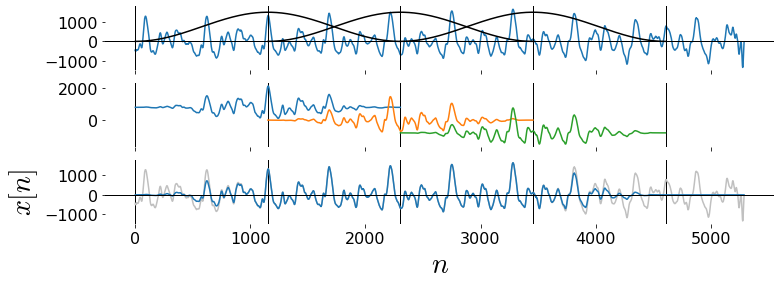

In [50]:
Nx=size(x)
x2=zeros(size(x))
Nblock=1152
#Risanje
fig, ax= plt.subplots(3,1,figsize=(12,4), sharex=True)
ax[0].plot(x)
ax[0].axvline(0, color='black', lw=1)
ax[0].axvline(Nblock, color='black', lw=1)
ax[1].axvline(0, color='black', lw=1)
ax[1].axvline(Nblock, color='black', lw=1)
ax[2].axvline(0, color='black', lw=1)
ax[2].axvline(Nblock, color='black', lw=1)
for i in range(0,4):
    if (Nblock*(i+2) > Nx): break
    ax[0].axvline((i+2)*Nblock, color='black', lw=1)
    ax[1].axvline((i+2)*Nblock, color='black', lw=1)
    ax[2].axvline((i+2)*Nblock, color='black', lw=1)
    n=range(Nblock*i,Nblock*(i+2))
    ax[1].plot(n,x[n]*windows.cosine(2*Nblock)**2-i*800+800)
    x2[n]=x2[n]+x[n]*windows.cosine(2*Nblock)**2              
    ax[0].plot(n,windows.cosine(2*Nblock)**2*1500,'k')          #Oknenje se izvaja 2x. Prvič pred obdelavo in drugič po obdelavi, zato je tu kvadrirano.
ax[2].plot(x,color='silver')
ax[2].plot(x2,color='tab:blue')
ax[0].axhline(0, color='black', lw=1)
ax[2].axhline(0, color='black', lw=1)
plt.ylabel(r'$x[n]$', fontsize=28)
plt.xlabel(r'$n$', fontsize=28)
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[2].set_frame_on(False)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 
